<br>
**<font face="calibri" color="black" size="6">Data Exploration and Prediction of House Price</font>**
<br><br>
**<font face="calibri"size="4" color="black" >July 2017</font>** <br> <br> <br> <br>
**<font face="calibri" color="blue" size="5">Part I Introduction</font>**
<br><br>
**<font face="calibri" size="4" color="black" >Goal</font>**
<br><br><font face="calibri" color="black" size="4">Predict the sale price of houses. </font>
<br><br><br>
**<font face="calibri" size="4"color="black" >Dataset Description</font>**
<br><br><font face="calibri" color="black" size="4">In this dataset, there are 1460 observations with 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. Among explanatory variables, there are 37 integer variables, such as Id, MSSubClass, LotFrontage, and 43 factor variables, such as MSZoning, Street, LotShape. Descriptive analysis and quantitative analysis will use subsets of it depending on models.</font> 
<br><br>
<font face="calibri" color="black" size="4">First part of this report: <b>Descriptive and Exploratory Analysis</b>
<br><br>Second part of this report:  <b>Predictive Analysis. </b></font> 
<img src="http://sturdyhome.com/wp-content/uploads/2013/09/House-images-2013-3.jpg
">


**<font face="calibri" color="blue" size="5">Part II  Data Assessment</font>**

**<font face="calibri" color="blue" size="4">2.1 Import Data</font>**

In [1]:
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(gplots)
library(repr)

# Change plot size to 9 x 6
options(repr.plot.width=9, repr.plot.height=6)

list.files("../input")


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



[1] "sample_submission.csv" "test.csv"              "train.csv"

In [2]:
train <- read.csv("../input/train.csv")

**<font face="calibri" color="blue" size="4">2.2 Check Missing Data</font>**

<font face="calibri" color="black" size="4">We find that every row in this dataset has missing value, and we will deal with it later. </font>

In [3]:
# list rows of data that have missing values 
missing_row <- train[!complete.cases(train),]
head(missing_row)

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour
1 1  60         RL       65           8450   Pave   NA    Reg      Lvl        
2 2  20         RL       80           9600   Pave   NA    Reg      Lvl        
3 3  60         RL       68          11250   Pave   NA    IR1      Lvl        
4 4  70         RL       60           9550   Pave   NA    IR1      Lvl        
5 5  60         RL       84          14260   Pave   NA    IR1      Lvl        
6 6  50         RL       85          14115   Pave   NA    IR1      Lvl        
  Utilities ⋯ PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold SaleType
1 AllPub    ⋯ 0        NA     NA    NA            0      2     2008   WD      
2 AllPub    ⋯ 0        NA     NA    NA            0      5     2007   WD      
3 AllPub    ⋯ 0        NA     NA    NA            0      9     2008   WD      
4 AllPub    ⋯ 0        NA     NA    NA            0      2     2006   WD      
5 AllPub    ⋯ 0        NA     NA    NA            0     12     2008   WD      
6 AllPub    ⋯ 0        NA     MnPrv Shed        700     10     2009   WD      
  SaleCondition SalePrice
1 Normal        208500   
2 Normal        181500   
3 Normal        223500   
4 Abnorml       140000   
5 Normal        250000   
6 Normal        143000

In [4]:
nrow(missing_row)

[1] 1460

**<font face="calibri" color="blue" size="4">2.3 Select Variables</font>**
<br><br>
<font face="calibri" color="black" size="4"><b>Step 1</b>: select variables that may have greater impact on house price <br><br> <b>Step 2</b>: build subset of train dataset for prediction. 
<br><br></font>

In [5]:
## show all variable names
var_name <- names(train)
var_name

[1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "X1stFlrSF"    
[45] "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[61] "GarageFinish"  "GarageCars"    "GarageArea"    "GarageQual"   
[65] "GarageCond"    "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"  
[69] "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"   "PoolArea"     
[73] "PoolQC"        "Fence"         "MiscFeature"   "MiscVal"      
[77] "MoSold"        "YrSold"        "SaleType"      "SaleCondition"
[81] "SalePrice"

In [6]:
#Here, we select these important variables by creating a vector that contains variable names
select_var <- c('Id','MSZoning','Utilities', 'Neighborhood','BldgType','HouseStyle',
                'OverallQual','OverallCond','YearBuilt', 'ExterQual','ExterCond',
                'BsmtQual','BsmtCond','TotalBsmtSF','Heating','HeatingQC', 
                'CentralAir','Electrical','GrLivArea','BedroomAbvGr','KitchenAbvGr',
                'KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu',
               'GarageArea','GarageQual','GarageCond','OpenPorchSF','PoolArea',
                'Fence','MoSold','YrSold','SaleType','SaleCondition','SalePrice') 

In [7]:
# construct subset of train dataset that is used for prediction
select_train <- train[,select_var]
head(select_train)

Id MSZoning Utilities Neighborhood BldgType HouseStyle OverallQual
1 1  RL       AllPub    CollgCr      1Fam     2Story     7          
2 2  RL       AllPub    Veenker      1Fam     1Story     6          
3 3  RL       AllPub    CollgCr      1Fam     2Story     7          
4 4  RL       AllPub    Crawfor      1Fam     2Story     7          
5 5  RL       AllPub    NoRidge      1Fam     2Story     8          
6 6  RL       AllPub    Mitchel      1Fam     1.5Fin     5          
  OverallCond YearBuilt ExterQual ⋯ GarageQual GarageCond OpenPorchSF PoolArea
1 5           2003      Gd        ⋯ TA         TA         61          0       
2 8           1976      TA        ⋯ TA         TA          0          0       
3 5           2001      Gd        ⋯ TA         TA         42          0       
4 5           1915      TA        ⋯ TA         TA         35          0       
5 5           2000      Gd        ⋯ TA         TA         84          0       
6 5           1993      TA        ⋯ TA         TA         30          0       
  Fence MoSold YrSold SaleType SaleCondition SalePrice
1 NA     2     2008   WD       Normal        208500   
2 NA     5     2007   WD       Normal        181500   
3 NA     9     2008   WD       Normal        223500   
4 NA     2     2006   WD       Abnorml       140000   
5 NA    12     2008   WD       Normal        250000   
6 MnPrv 10     2009   WD       Normal        143000

In [8]:
summary(select_train)

       Id            MSZoning     Utilities     Neighborhood   BldgType   
 Min.   :   1.0   C (all):  10   AllPub:1459   NAmes  :225   1Fam  :1220  
 1st Qu.: 365.8   FV     :  65   NoSeWa:   1   CollgCr:150   2fmCon:  31  
 Median : 730.5   RH     :  16                 OldTown:113   Duplex:  52  
 Mean   : 730.5   RL     :1151                 Edwards:100   Twnhs :  43  
 3rd Qu.:1095.2   RM     : 218                 Somerst: 86   TwnhsE: 114  
 Max.   :1460.0                                Gilbert: 79                
                                               (Other):707                
   HouseStyle   OverallQual      OverallCond      YearBuilt    ExterQual
 1Story :726   Min.   : 1.000   Min.   :1.000   Min.   :1872   Ex: 52   
 2Story :445   1st Qu.: 5.000   1st Qu.:5.000   1st Qu.:1954   Fa: 14   
 1.5Fin :154   Median : 6.000   Median :5.000   Median :1973   Gd:488   
 SLvl   : 65   Mean   : 6.099   Mean   :5.575   Mean   :1971   TA:906   
 SFoyer : 37   3rd Qu.: 7.000   3rd

<font face="calibri" color="black" size="4">To get better understanding about this dataset,  I summaried all importabt variables in terms of minimum, first quartile, median, mean, third quantile and maximum value. </font>

**<font face="calibri" color="blue" size="4">2.4 Descriptive and exploratory analysis of SalePrice</font><br><br>** 

<font face="calibri" color="Black" size="4">SalePrice is our target variable and also the dependent variable for prediction. According to the assumptions of Linear Regression, data should be normally distributed. By checking the distribution of SalePrice, we can decide if we need non-linear transformation, like log term, to make better prediction. </font>


**<font face="calibri" color="blue" size="4">2.4.1 Summary of Target Variable: SalePrice</font>**

In [9]:
# Five number summary
summary(select_train$SalePrice)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34900  129975  163000  180921  214000  755000 

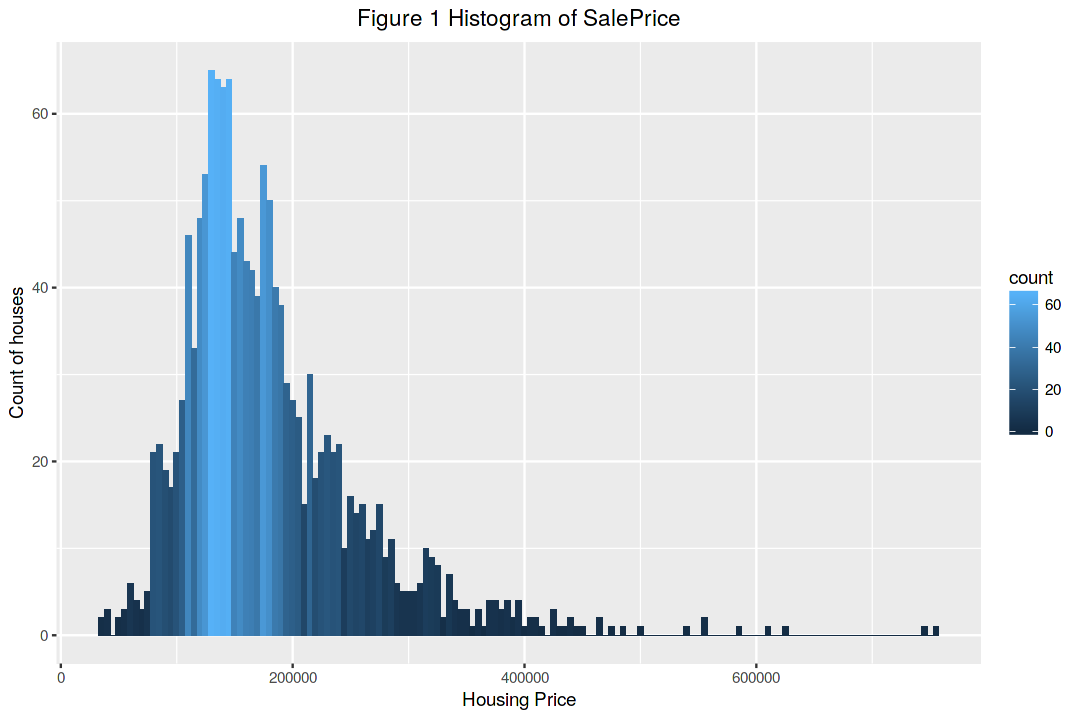

In [10]:
# Draw a higtogram to figure out the distribution of SalePrice
options(scipen=10000)
ggplot(select_train, aes(x = SalePrice, fill = ..count..)) +
  geom_histogram(binwidth = 5000) +
  ggtitle("Figure 1 Histogram of SalePrice") +
  ylab("Count of houses") +
  xlab("Housing Price") + 
  theme(plot.title = element_text(hjust = 0.5))

<font face="calibri" size="4">From the histogram above, the distribution of our target variable-- SalePrice is skewed to right.  Thus, a log term of SalePrice should be generated for linear regression. Here, we name it lSalePrice.  </font>

In [11]:
#log term of SalePrice
select_train$lSalePrice <- log(select_train$SalePrice)

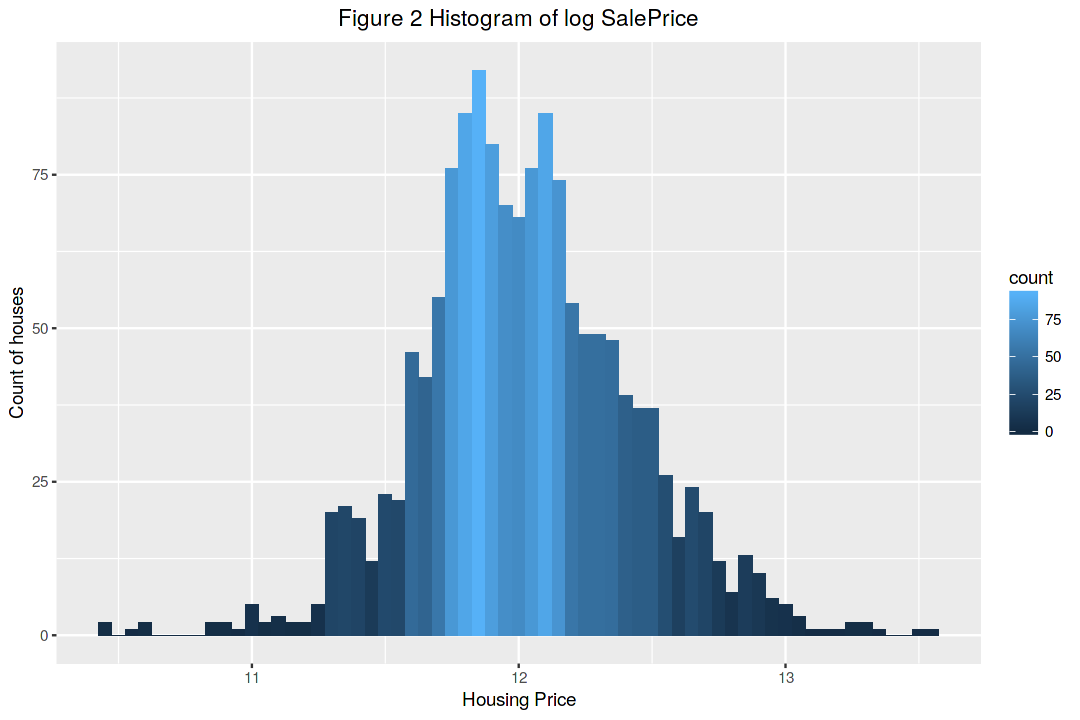

In [12]:
# Draw a higtogram to figure out the distribution of log SalePrice

ggplot(select_train, aes(x = lSalePrice, fill = ..count..)) +
  geom_histogram(binwidth = 0.05) +
  ggtitle("Figure 2 Histogram of log SalePrice") +
  ylab("Count of houses") +
  xlab("Housing Price") + 
  theme(plot.title = element_text(hjust = 0.5))

![](http://)<font face="calibri" color="Black" size="4">Great! After fixing, <b>lSalePrice</b> is normally distributed. We will use this log term of SalePrice later in models.</font>

**<font face="calibri" color="blue" size="4">2.4.2 Explore the distribution of SalePrice by MSZoning</font>**


<font face="calibri" size="4">  When it comes to housing price, the value of house is usually related to two types of elements:  internal and external.  <b>Internal elements</b> are the key features of house itself, like total area, the number of rooms. As for <b>External elements</b>, environment is one of the key factors. 
<br><br>First, let's figure out the variable that can indicates housing environment in our dataset. Here, I choose <b>MSZoning </b> as this indicator. It's a dummy variable and the identiciation is: </font>
<br><br>
<font face="calibri" size="4">MSZoning: Identifies the general zoning classification of the sale.</font>
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
       
<font face="calibri" size="4">Therefore, in this section, I will explore the relationship between MSZoning and our target variable SalePrice.   </font>

<font face="calibri" size="4">First, let's have a close look at <b>MSZoning</b>. Because it's a dummy variable, I am curious about the total number of houses in each category. </font>

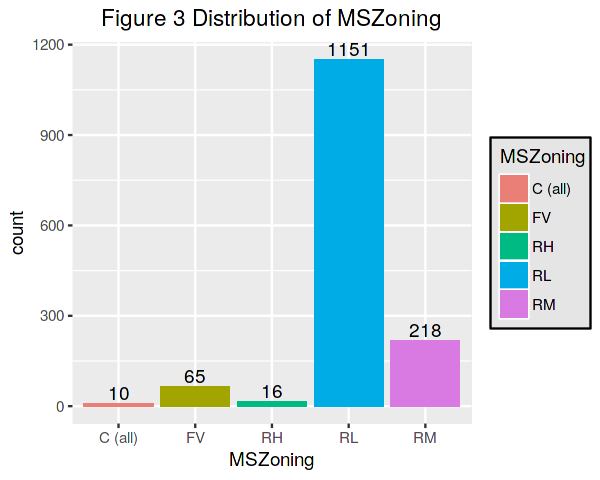

In [13]:
# count house by MSZoning
options(repr.plot.width=5, repr.plot.height=4)
ggplot(select_train, aes(x = MSZoning, fill = MSZoning )) + 
geom_bar()+ 
scale_fill_hue(c = 80)+
ggtitle("Figure 3 Distribution of MSZoning")+
theme(plot.title = element_text(hjust = 0.5),legend.position="right", legend.background = element_rect(fill="grey90",
                                                                                                           size=0.5, linetype="solid", 
                                                                                                           colour ="black"))+
geom_text(stat='count',aes(label=..count..),vjust=-0.25)

In [14]:
# Distribution of MSZoning
table(select_train$MSZoning)


C (all)      FV      RH      RL      RM 
     10      65      16    1151     218 

<font face="calibri" size="4">From the graph and table above, it is obvious that most of houses in this dataset are built in the area of Residential Low Density(1151 houses), and follows by Residential Medium Density(218 houses). Few houes are built in Commercial, Floating Village and Residential High Density. 
<br><br>
 Since a large amount of houses comes to the categoreis of Residential Low Density and Residential Medium Density, these two areas should be paid more attention for housing price analysis. </font>
 <br><br>

<font face="calibri" size="4">On top of it, let's add our target variable into analysis. How does housing price look like in each category? Here, I use boxplot to show the distribution of prices in each MSZoning. </font>

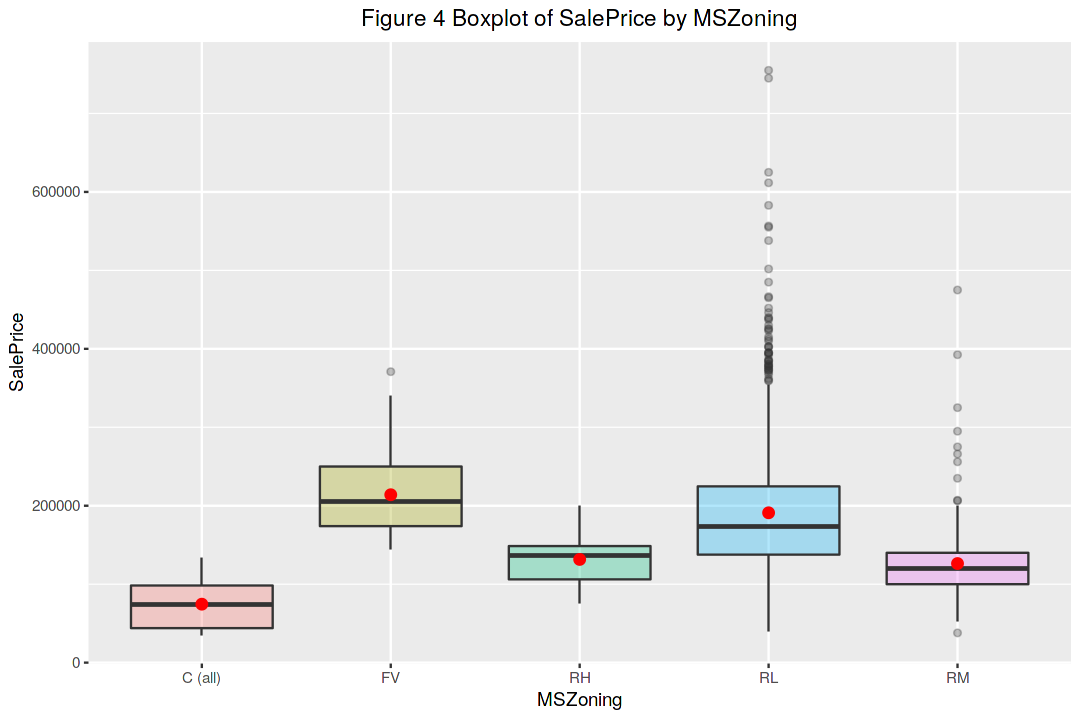

In [15]:
# Change plot size to 9 x 6
options(repr.plot.width=9, repr.plot.height=6)
#boxplot of SalePrice by MSZoning
#add average value of SalePrice as red point
ggplot(select_train, aes(x=MSZoning, y=SalePrice, fill=MSZoning)) + 
  geom_boxplot(alpha=0.3) +
  stat_summary(fun.y=mean, geom="point", shape=20, size=4, color="red", fill="red")+
  theme(legend.position="none")+
  ggtitle("Figure 4 Boxplot of SalePrice by MSZoning")+
  theme(plot.title = element_text(hjust = 0.5))

<font face="calibri" size="4">The graph above shows the distribution of SalePrice by MSZoning. The sales in "Floating Village Residential" area have the highest average sale price, and then followed by "Residential Low Density". While "Commercial" sales have the lowest average sale price. </font> 
<br><br>
<font face="calibri" size="4">It is quite strange that commercial area has the lowest average Sale Price while village area has the highest. One possible explanation could be SalePrice is also related to the size of houses. To confirm, let's explore the average size in these area.</font> 

<font face="calibri" size="4">The variable indicates size in this dataset is called <b>GrLivArea</b>. 
  <br><br>
 <b>Definition</b>: Above grade (ground) living area square feet</font>
  <br><br>
 

In [16]:
# Display the average hosue size in each area
library(plyr)

ddply(train, .(MSZoning), summarize,  size=mean(GrLivArea))

MSZoning size    
1 C (all)  1191.400
2 FV       1574.538
3 RH       1510.125
4 RL       1551.646
5 RM       1322.073

<font face="calibri" size="4">It is obvious that the avarage size of houses in Commecial are is much smaller than Floating Village area, which verified our assumption above. </font> 

**<font face="calibri" color="blue" size="4">2.4.3 Explore the distribution of SalePrice by BldfType</font>**

<font face="calibri" size="4">Next, We are going to describe SalePrice by different cateogries of BldfType. </font>
<br><br>
<font face="calibri" size="4">BldgType: Type of dwelling
    
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit


<font face="calibri" size="4">To get a quick feel about BldgType, I use a table here to count houses in each catetory and also show maximum and minimum SalePrice. </font >

In [17]:
library(plyr)
ddply(train, .(BldgType), summarize,Total = length(BldgType),Max_price=max(SalePrice),Min_price=min(SalePrice))

BldgType Total Max_price Min_price
1 1Fam     1220  755000    34900    
2 2fmCon     31  228950    55000    
3 Duplex     52  206300    82000    
4 Twnhs      43  230000    75000    
5 TwnhsE    114  392500    75500

<font face="calibri" size="4">In previous section I used Boxplot to describe MSZoning, while for BldgType I will use Histogram, since I am more interested in the distribution rather than summary numbers. </font>

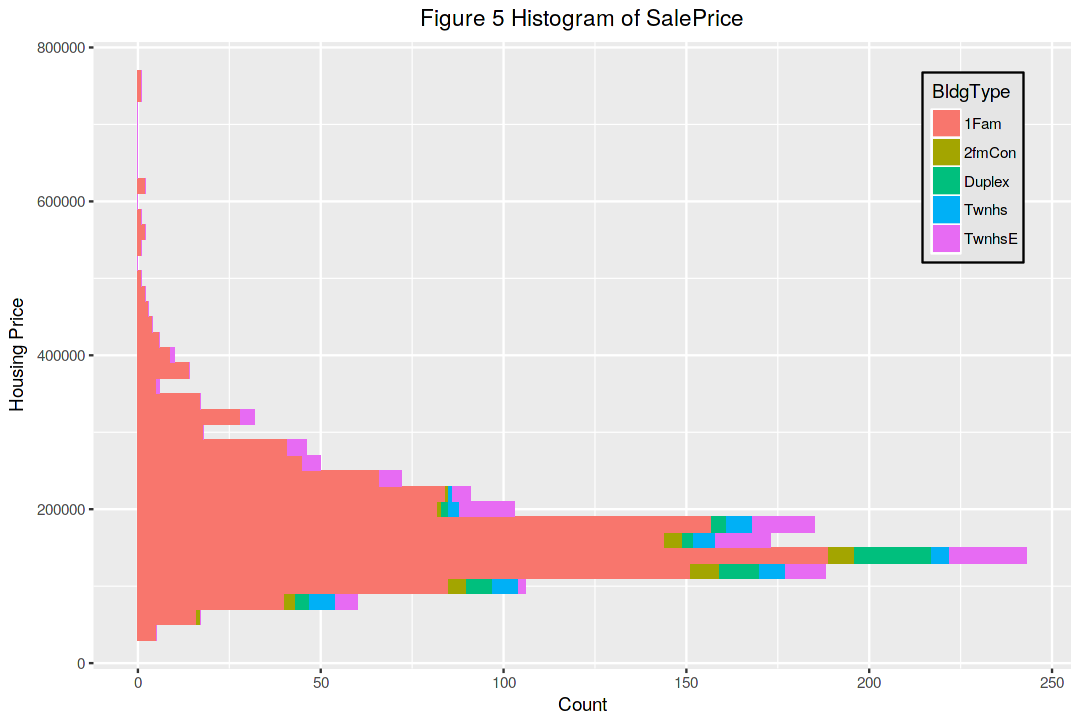

In [18]:
# historgram of housing price by BldgType 
ggplot(select_train, aes(SalePrice)) +
 geom_histogram(aes(fill = BldgType), position = position_stack(reverse = TRUE), binwidth = 20000) +
 coord_flip() + ggtitle("Figure 5 Histogram of SalePrice") +
 ylab("Count") +
 xlab("Housing Price") + 
 theme(plot.title = element_text(hjust = 0.5),legend.position=c(0.9,0.8), legend.background = element_rect(fill="grey90",
                                                                                                           size=0.5, linetype="solid", 
                                                                                                           colour ="black"))

<font face="calibri" size="4">More thoughts about the graph above: 
1. For houses with type of Single-family Detached, most of their prices are within the range from 50000 to 300000
2. For Two-family Conversion, Duplex, Townhouse End Unit and Townhouse Inside Unit, most of house prices are ranging from 75000 to 210000
3. The highest and lowest house price both come to Single-family Detached house type


**<font face="calibri" color="blue" size="4">2.4.4 Explore the distribution of SalePrice by OverallQual</font>**

<font face="calibri" size="4">The last one is OverallQual. 
    
 OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

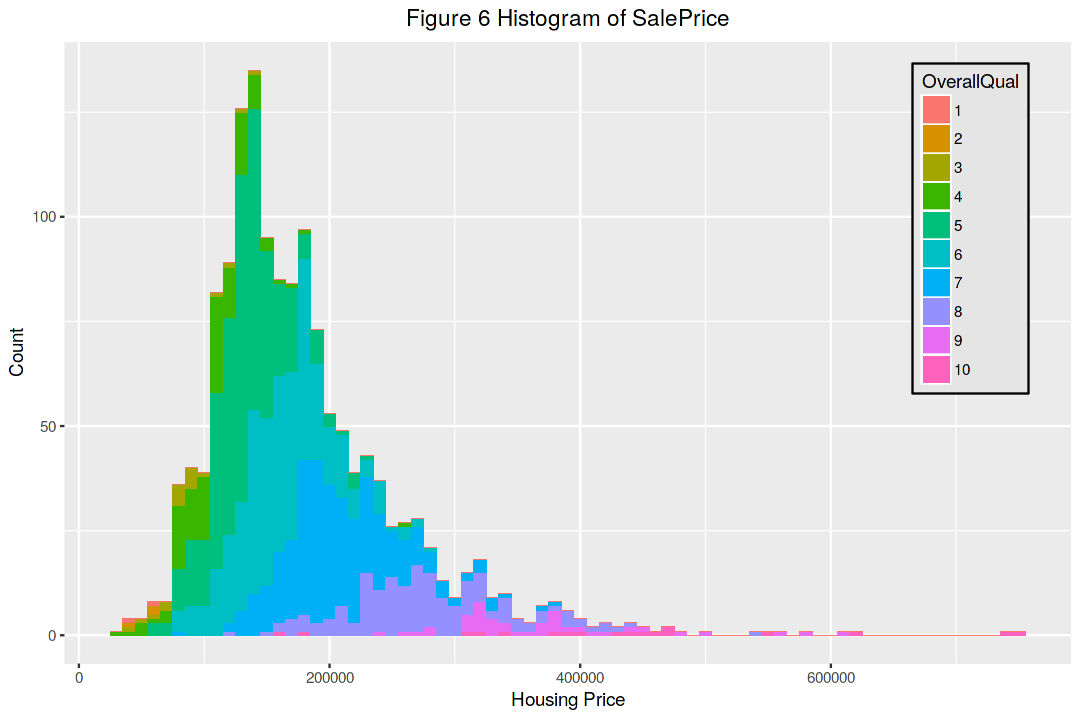

In [19]:
ggplot(select_train, aes(x = SalePrice,fill = as.factor(OverallQual))) +
  geom_histogram(position = "stack", binwidth = 10000) +
  ggtitle("Figure 6 Histogram of SalePrice") +
  ylab("Count") +
  xlab("Housing Price") + 
  scale_fill_discrete(name="OverallQual")+
  theme(plot.title = element_text(hjust = 0.5), legend.position=c(0.9,0.7), legend.background = element_rect(fill="grey90",
                                                                                                           size=0.5, linetype="solid", 
                                                                                                           colour ="black"))

<font face="calibri" size="4">As we saw in graph above: 
 1. Most houese are with OverallQuall of 4,5,6 and 7, equivalent to "Below Average", "Average", "Above Average" and "Good"
 2. The higher rate of overall quality, the higher house sale price
 3. For each rate level of overall quality, the distribution of house price is almost symmetric

**<font face="calibri" color="blue" size="4">2.5 What kind of house will be sold for higher price?</font>**

**<font face="calibri" color="blue" size="4">2.5.1 Correlation Exploreation</font>**

<font face="calibri" size="4">Let's select variables first. 
<br><br>Variables for correlation exploration: SalePrice','OverallQual','OverallCond','YearBuilt','ExterCond2','TotalBsmtSF','HeatingQC2' </font>


<font face="calibri" size="4">In order to have a clear view of how the key variables relate to SalePrice, I decide to use Correlation Heatmap to plot correlation coefficients. 
<br><br>But before plotting heatmap,  one more step is needed-- feature engineering. In section I, we learn that some variables are factors, in order to buid heatmap we need to convert them into numerics. 
<br><br>Since these factor varaibles evaluate quality of house with ordered levels, such as  "Ex", "Fa","Gd", "TA", and "Po", here, I match them to numbers: "1","2","3","4", and "5".   That is, the smaller number, the higher level. After transforming, all the variables used for heatmap are numberic. </font>

In [20]:
# convert factor to numeric
select_train$ExterCond2 <- as.numeric(factor(select_train$ExterCond, 
                                  levels = c("Ex", "Fa","Gd", "TA","Po"),
                                  labels = c(5,2,4,3,1) ,ordered = TRUE))
select_train$HeatingQC2 <- as.numeric(factor(select_train$HeatingQC, 
                                  levels = c("Ex", "Fa","Gd", "TA","Po"),
                                  labels = c(5,2,4,3,1) ,ordered = TRUE))
select_train$CentralAir2 <- as.numeric(factor(select_train$CentralAir, 
                                  levels = c("N", "Y"),
                                  labels = c(0,1) ,ordered = TRUE))

In [21]:
#select variables that be used for model buidling and heat map
model_var <- c('SalePrice', 
                'OverallQual','OverallCond','YearBuilt','ExterCond2',
                'TotalBsmtSF','HeatingQC2', 
                'CentralAir2','GrLivArea','BedroomAbvGr','KitchenAbvGr',
                'TotRmsAbvGrd','Fireplaces',
                'GarageArea','OpenPorchSF','PoolArea',
                 'YrSold')
heat <- select_train[,model_var]

<font face="calibri" size="4">Next, using ggplot plot correlation heatmap. </font>

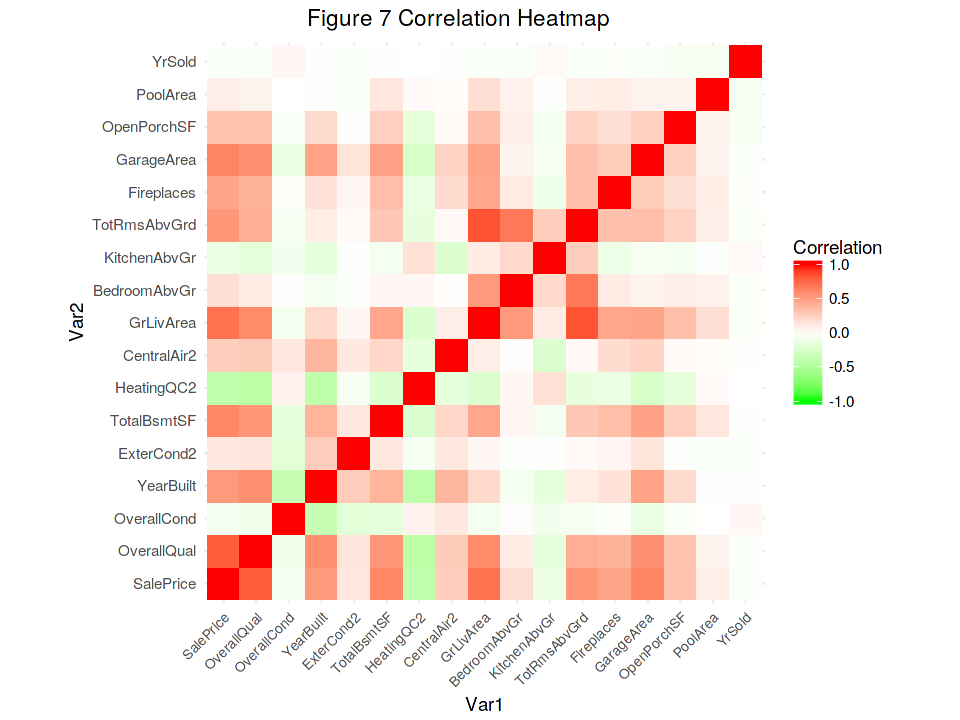

In [22]:
#plot correlation heatmap for SalePrice
options(repr.plot.width=8, repr.plot.height=6)
library(ggplot2)
library(reshape2)
qplot(x=Var1, y=Var2, data=melt(cor(heat, use="p")), fill=value, geom="tile") +
   scale_fill_gradient2(low = "green", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Correlation") +
   theme_minimal()+ 
   theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 8, hjust = 1))+
   coord_fixed()+
   ggtitle("Figure 7 Correlation Heatmap") +
   theme(plot.title = element_text(hjust = 0.4))

<font face="calibri" size="4"> In this graph, <b>Red </b>indicates perfect positive correlation and <b>Green</b> indicates perfect negative correlation. As we can see, there are several variables should be paid attention to: GarageArea, Fireplaces, TotRmsAbvGrd, GrLivArea, HeatingQC, TotalBsmtSF and YearBuild.

**<font face="calibri" color="blue" size="4">2.5.2 Correlation between SalePrice and some numeric variables</font>**

<font face="calibri" size="4">In this section, I am going to analyze the correlation between SalePrice and numeric variables, including <b>GrLivArea</b>,<b>TotalBsmtSF</b>, <b>TotRmsAbvGrd</b>, <b>GarageArea</b>. Different from categorical variables, here I will use scatter plot and trend line to indicate the relationship. 

In [23]:
# scatter plot of GrLiveArea
# Change plot size to 5 x 4
options(repr.plot.width=9, repr.plot.height=6)
p1 <- ggplot(select_train, aes(x=GrLivArea, y=SalePrice)) + 
  geom_point(shape=1) +  
  geom_smooth(method=lm , color="red", se=FALSE)+
  ggtitle("Figure 8 Scatter plot of SalePrice and GrLivArea") +
  theme(plot.title = element_text(hjust = 0.4))

# scatter plot of TotalBsmtSF
p2 <- ggplot(select_train, aes(x=TotalBsmtSF, y=SalePrice)) + 
  geom_point(shape=1) +  
  geom_smooth(method=lm , color="red", se=FALSE)+
  ggtitle("Figure 9 Scatter plot of SalePrice and TotalBsmtSF") +
  theme(plot.title = element_text(hjust = 0.4))

#scatter plot of TotRmsAbvGrd
p3 <- ggplot(select_train, aes(x=TotRmsAbvGrd, y=SalePrice)) + 
  geom_point(shape=1) +  
  geom_smooth(method=lm , color="red", se=FALSE)+
  ggtitle("Figure 10 Scatter plot of SalePrice and TotRmsAbvGrd") +
  theme(plot.title = element_text(hjust = 0.4))

#scatter plot of GarageArea
p4 <- ggplot(select_train, aes(x=GarageArea, y=SalePrice)) + 
  geom_point(shape=1) +  
  geom_smooth(method=lm , color="red", se=FALSE)+
  ggtitle("Figure 11 Scatter plot of SalePrice and GarageArea") +
  theme(plot.title = element_text(hjust = 0.4))



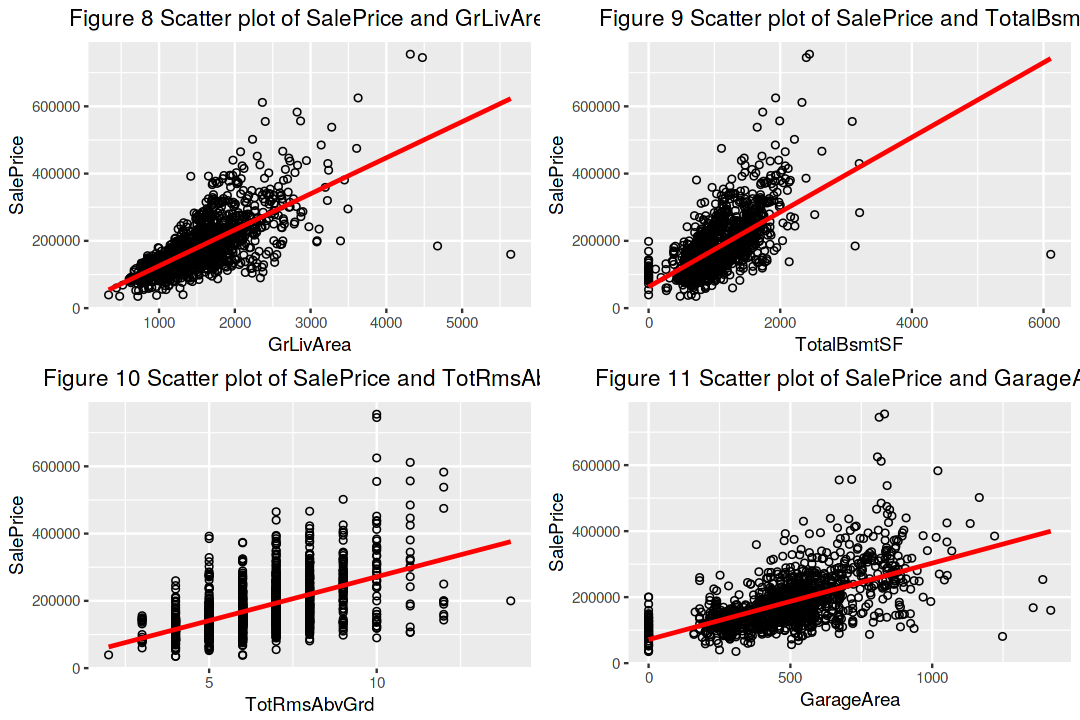

In [24]:
library(gridExtra)
grid.arrange(p1, p2,p3,p4)

<font face="calibri" size="4"> Some thoughts about these graphs:
1. GrLivArea, TotalBsmtSF, TotRmsAbvGrd, and GarageArea are positively correlated with SalePrice, which means with the increase of GrLivArea, TotalBsmtSF, TotRmsAbvGrd and GarageArea, the SalePrice also increases. 
2. TotalBsmtSF has more concentrated distribution than others
    

**<font face="calibri" color="blue" size="5">Part III  Model Fitting</font>**

<font face="calibri" size="4"> After Descriptive Analysis we are moving into Predictive Analysis section.  There are three models here:
<br><br><b>Linear Regresion Model</b>
<br><br><b>Classification & Regression Trees (CART) Model</b>
<br><br><b>Random Forest Model </b></font >

**<font face="calibri" color="blue" size="4">3.1 Linear Regression Model</font>**

<font face="calibri" size="4">In Linear Regresion Model, the relationships between Dependent and Indepedent Variables is expressed by equation with coefficients. The aim of this model is to minimize the sum of the squared residuals.  Here I select 16 variables to fit into this model. 

<font face="calibri" size="4">**Variables in this model**: 
<br><br>SalePrice,  OverallQual, OverallCond, YearBuilt, ExterQual2, ExterCond2, TotalBsmtSF, HeatingQC2, CentralAir2, GrLivArea, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageArea,<br>
OpenPorchSF, PoolArea,YrSold</font>

<font face="calibri" size="4">Step 1: choose variables and transfer SalePrice into log term

In [25]:
#prediction of lm
#build model dataset for linear regression 
model_lin <- select_train[, model_var]
model_lin$lSalePrice <- log(model_lin$SalePrice)

<font face="calibri" size="4">Step 2: divide datasets into two parts -- training and validation, to prepare for prediction later

In [26]:
#partition data
set.seed(10000)
train.index <- sample(c(1:dim(model_lin)[1]), dim(model_lin)[1]*0.8)
model_lin_train = model_lin[train.index,]
model_lin_valid <- model_lin[-train.index,]

<font face="calibri" size="4">Step 3: run regression

In [27]:
#use lm() to run linear regression of SalePrice on all variables in model dataset
linreg <- lm(lSalePrice~.-SalePrice, data = model_lin_train)
summary(linreg)


Call:
lm(formula = lSalePrice ~ . - SalePrice, data = model_lin_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58114 -0.06702  0.00342  0.07786  0.44064 

Coefficients:
                  Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)   5.6023217895  6.1903443257   0.905              0.36565    
OverallQual   0.0672509736  0.0050771139  13.246 < 0.0000000000000002 ***
OverallCond   0.0592300019  0.0042589866  13.907 < 0.0000000000000002 ***
YearBuilt     0.0033446003  0.0002151885  15.543 < 0.0000000000000002 ***
ExterCond2    0.0173620804  0.0104747653   1.658              0.09769 .  
TotalBsmtSF   0.0001781542  0.0000126056  14.133 < 0.0000000000000002 ***
HeatingQC2   -0.0163295194  0.0035734007  -4.570 0.000005409910875534 ***
CentralAir2   0.0578755232  0.0199820314   2.896              0.00385 ** 
GrLivArea     0.0002318796  0.0000173153  13.392 < 0.0000000000000002 ***
BedroomAbvGr -0.0118786527  0.0073986920  -1.606              0.10866

<font face="calibri" size="4">Step 4: forecast and check for model accuracy

In [28]:
library(forecast)
#use predict() to make prediction on a new set
pred1 <- predict(linreg,model_lin_valid,type = "response")
residuals <- model_lin_valid$lSalePrice - pred1
linreg_pred <- data.frame("Predicted" = pred1, "Actual" = model_lin_valid$lSalePrice, "Residual" = residuals)
accuracy(pred1, model_lin_valid$lSalePrice)


Attaching package: ‘forecast’

The following object is masked from ‘package:ggplot2’:

    autolayer



ME          RMSE      MAE       MPE        MAPE     
Test set -0.01358129 0.2256403 0.1155791 -0.1262696 0.9675185

**<font face="calibri" color="blue" size="4">3.2 CART</font>**


Regression tree:
rpart(formula = lSalePrice ~ . - SalePrice, data = model_lin_train, 
    control = rpart.control(cp = 0.01))

Variables actually used in tree construction:
[1] CentralAir2 GarageArea  GrLivArea   OverallCond OverallQual TotalBsmtSF

Root node error: 182.93/1168 = 0.15661

n= 1168 

         CP nsplit rel error  xerror     xstd
1  0.459527      0   1.00000 1.00138 0.049656
2  0.086240      1   0.54047 0.54351 0.030019
3  0.071446      2   0.45423 0.46729 0.027024
4  0.049339      3   0.38279 0.40445 0.024325
5  0.023257      4   0.33345 0.35746 0.021596
6  0.019324      5   0.31019 0.34290 0.020669
7  0.017259      6   0.29087 0.33024 0.019701
8  0.012367      7   0.27361 0.30179 0.017780
9  0.011729      8   0.26124 0.29326 0.017140
10 0.010000      9   0.24951 0.28807 0.016811


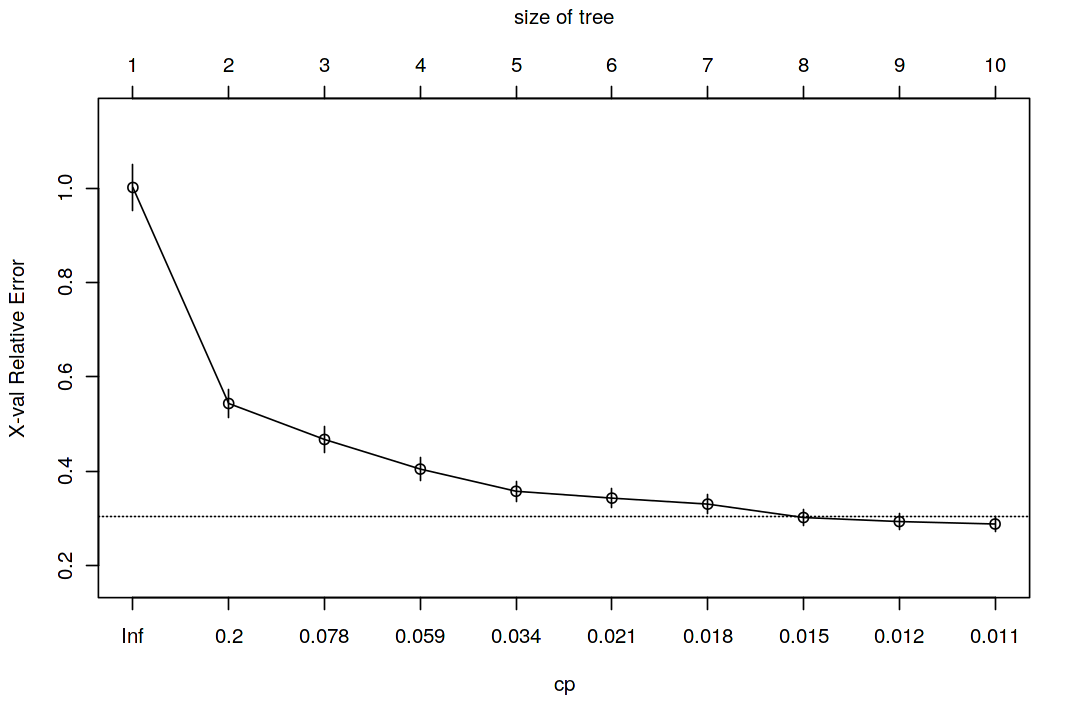

In [29]:
# classification tree
library(rpart)
library(rpart.plot)

class.tree <- rpart(lSalePrice~.-SalePrice,
                    data = model_lin_train,control = rpart.control(cp = 0.01))

plotcp(class.tree)
printcp(class.tree)

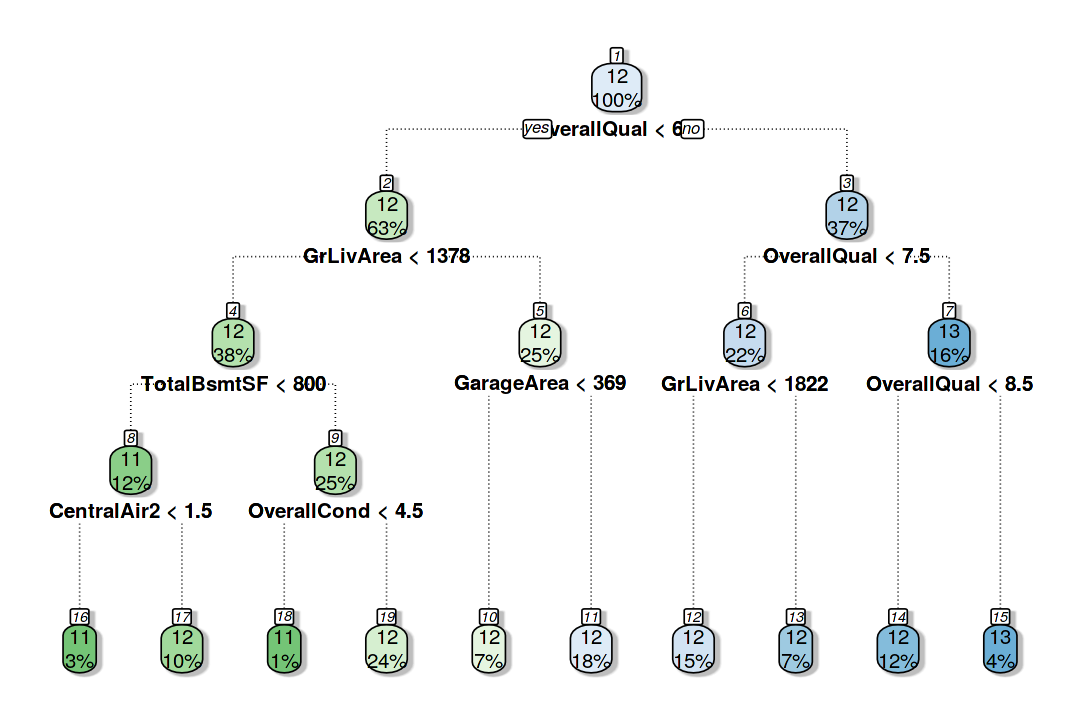

In [30]:
rpart.plot(class.tree, 
           box.palette="GnBu",
           branch.lty=3, shadow.col="gray", nn=TRUE)

**<font face="calibri" color="blue" size="4">3.3 Random Forest</font>**

In [31]:
#Random Forest
library(randomForest)
RF <- randomForest(lSalePrice ~.-SalePrice, data = model_lin_train, 
                   importance =TRUE,ntree=500,nodesize=7, na.action=na.roughfix)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:gridExtra’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



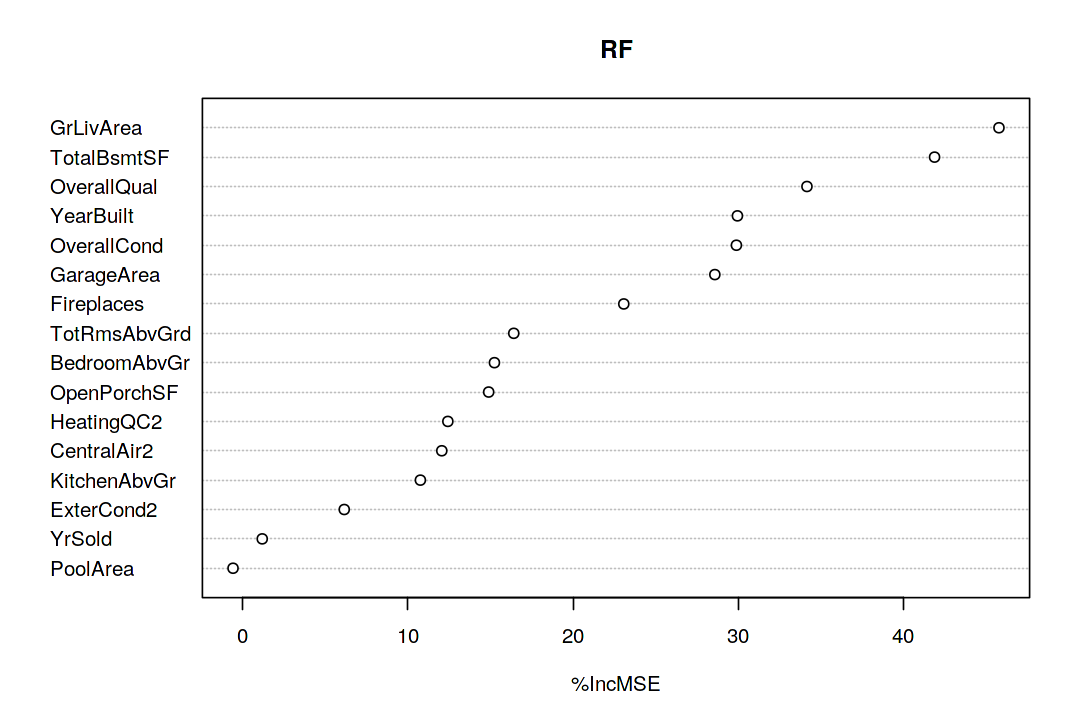

In [32]:
# variable importance
options(repr.plot.width=9, repr.plot.height=6)
varImpPlot(RF, type=1)

In [33]:
#prediction
rf.pred <- predict(RF, newdata=model_lin_valid )
accuracy(rf.pred, model_lin_valid$lSalePrice)

ME          RMSE      MAE       MPE        MAPE     
Test set -0.01130087 0.1641079 0.1060444 -0.1150024 0.8869696

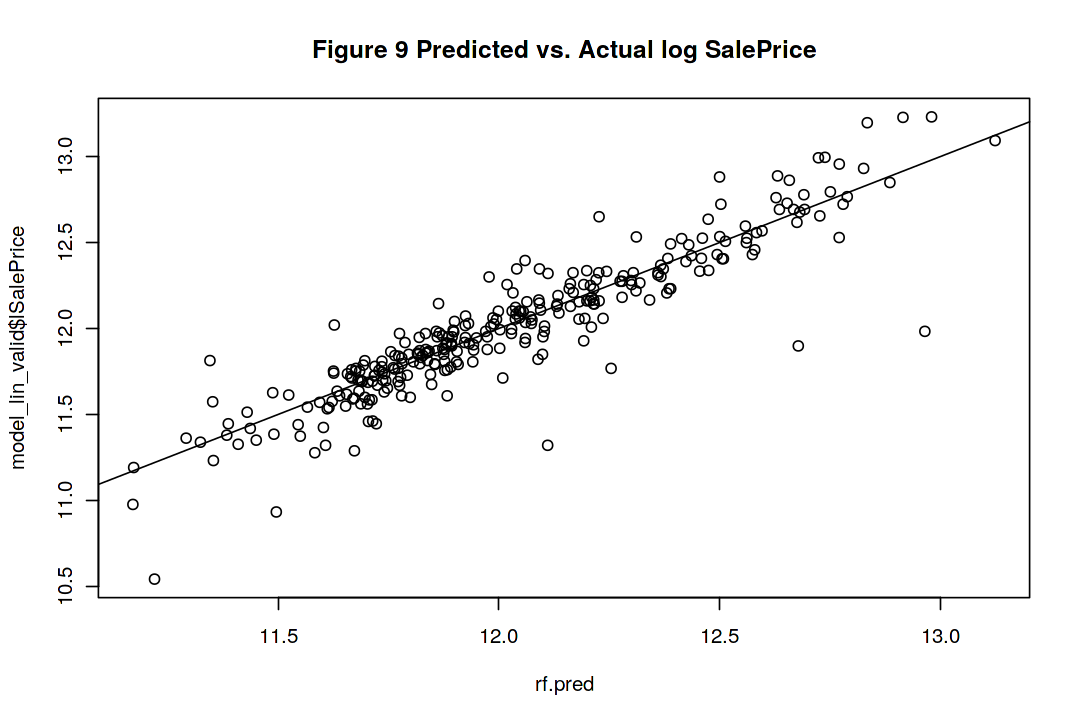

In [34]:
plot(rf.pred, model_lin_valid$lSalePrice, main = "Figure 9 Predicted vs. Actual log SalePrice") 
abline(0,1)